#Impotation des données

In [ ]:
import numpy as np
#optimisation de l'affichage: afficher que quelque lignes
np.set_printoptions(threshold=10000, suppress=True)
#lecture des fichiers csv, xls etc.
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
#eviter d'afficher des warnings
warnings.filterwarnings('ignore')

In [ ]:
#importation du dataset
churn=pd.read_csv('./Churn_Modelling.csv',sep=',',header=0)
#afficher les 3 premières lignes
churn.head(3)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
#les 10 premiers lignes
X= churn.iloc[:,1:10].values
#seulement 10ème colonne
Y= churn.iloc[:,10].values

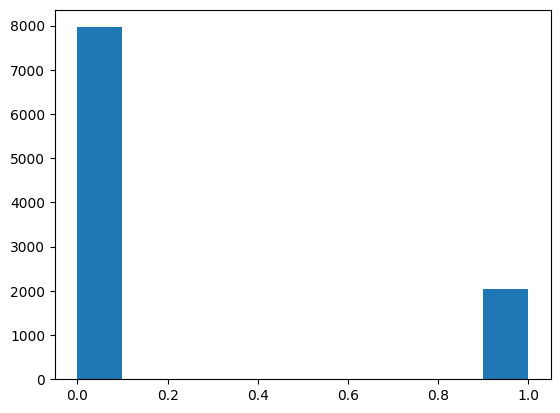

In [ ]:
#afficher le nombre d'instance de la colonne Y
plt.hist(Y)
plt.show()

#Partie apprentissage

In [ ]:
#skearn: bibliothèque de Machine et deep learning
from sklearn.model_selection import train_test_split
#importation des algorithmes
from sklearn.tree import DecisionTreeClassifier #arbre de décision
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import  MLPClassifier #reseaux de neurones
#importation de marice de confusion
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score


In [ ]:
#la base de test contiendra 25% des individus de la base totale
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=1)

In [ ]:
Xtrain.shape

(7500, 9)

Algorithme 1: decision tree classifier

In [ ]:
print('decisin tree')
DT=DecisionTreeClassifier(random_state=0,criterion='entropy')
 
#Apprentissage
DT.fit(Xtrain,Ytrain)

#prediction des clients
YDT=DT.predict(Xtest)

print('accuracy={0:.3f},recall={1:.3f},precision={2:.3f}'.format(accuracy_score(Ytest,YDT),precision_score(Ytest,YDT),recall_score(Ytest,YDT)))
print('matric de confusion')
print(confusion_matrix(Ytest,YDT))

decisin tree
accuracy=0.794,recall=0.506,precision=0.527
matric de confusion
[[1712  268]
 [ 246  274]]


Algorithme 2: MLP

In [ ]:
print('MLP')
MLP=MLPClassifier(hidden_layer_sizes=(20, 10),alpha=0.001,max_iter=200)
MLP.fit(Xtrain,Ytrain)
YMLP=MLP.predict(Xtest)
print('accuracy={0:.3f},recall={1:.3f},precision={2:.3f}'.format(accuracy_score(Ytest,YMLP),precision_score(Ytest,YMLP),recall_score(Ytest,YMLP)))
print('matric de confusion')
print(confusion_matrix(Ytest,YMLP))

MLP
accuracy=0.547,recall=0.256,precision=0.617
matric de confusion
[[1047  933]
 [ 199  321]]


Algorithme 3: KNN

In [ ]:
print('KNN')
KNN= KNeighborsClassifier(n_neighbors=5)
KNN.fit(Xtrain,Ytrain)
YKNN=KNN.predict(Xtest)
acc3=accuracy_score(Ytest,YKNN)
rec3=recall_score(Ytest,YKNN)
score3=(acc3+rec3)/2
print('>Score = {0:.3f}'.format(score3))


KNN
>Score = 0.423


Algorithme 4: Random Forest

In [ ]:
print('RF')
RF= RandomForestClassifier(n_estimators=100, random_state=1)
RF.fit(Xtrain,Ytrain)
YRF=RF.predict(Xtest)
acc4=accuracy_score(Ytest,YRF)
rec4=recall_score(Ytest,YRF)
score4=(acc4+rec4)/2
print('>Score = {0:.3f}'.format(score4))



RF
>Score = 0.637


Algorithme 5: AdaC

In [ ]:

 print('AdaC')
 AdaC=AdaBoostClassifier(n_estimators=100, random_state=0)
 AdaC.fit(Xtrain,Ytrain)
 YAdaC=AdaC.predict(Xtest)
 acc5=accuracy_score(Ytest,YAdaC)
 rec5=recall_score(Ytest,YAdaC)
 score5=(acc5+rec5)/2
 print('>Score = {0:.3f}'.format(score5))


AdaC
>Score = 0.654


Algorithme 6: ExtC

In [ ]:
 print('ExtC')
 ExtC=ExtraTreesClassifier(n_estimators=100, random_state=0)
 ExtC.fit(Xtrain,Ytrain)
 YExtC=ExtC.predict(Xtest)
 acc6=accuracy_score(Ytest,YExtC)
 rec6=recall_score(Ytest,YExtC)
 score6=(acc6+rec6)/2
 print('>Score = {0:.3f}'.format(score6))

ExtC
>Score = 0.634
